In [5]:
pip list

Package                      Version
---------------------------- ------------
absl-py                      1.4.0
anyio                        3.5.0
argon2-cffi                  21.3.0
argon2-cffi-bindings         21.2.0
asttokens                    2.0.5
astunparse                   1.6.3
async-lru                    2.0.4
attrs                        23.1.0
Babel                        2.11.0
backcall                     0.2.0
beautifulsoup4               4.12.2
bleach                       4.1.0
Brotli                       1.0.9
cachetools                   5.3.2
certifi                      2024.2.2
cffi                         1.16.0
chardet                      5.2.0
charset-normalizer           2.0.4
click                        8.1.7
colorama                     0.4.6
comm                         0.1.2
contourpy                    1.2.0
cryptography                 41.0.7
cycler                       0.12.1
debugpy                      1.6.7
decorator                    5.1.1


In [3]:
import mediapipe

ModuleNotFoundError: No module named 'mediapipe'

In [1]:
import cv2
import mediapipe as mp
import os 
import matplotlib.pyplot as plt
import time 
import sklearn
import numpy as np
import math
import json 
import subprocess

In [2]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    result = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, result

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS,
                             mp_drawing.DrawingSpec(color=(80,70,45), thickness=1, circle_radius = 1), 
                             mp_drawing.DrawingSpec(color=(80,95,45), thickness=1, circle_radius = 1))
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [5]:
mp_holistic.POSE_CONNECTIONS

frozenset({(0, 1),
           (0, 4),
           (1, 2),
           (2, 3),
           (3, 7),
           (4, 5),
           (5, 6),
           (6, 8),
           (9, 10),
           (11, 12),
           (11, 13),
           (11, 23),
           (12, 14),
           (12, 24),
           (13, 15),
           (14, 16),
           (15, 17),
           (15, 19),
           (15, 21),
           (16, 18),
           (16, 20),
           (16, 22),
           (17, 19),
           (18, 20),
           (23, 24),
           (23, 25),
           (24, 26),
           (25, 27),
           (26, 28),
           (27, 29),
           (27, 31),
           (28, 30),
           (28, 32),
           (29, 31),
           (30, 32)})

In [10]:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
        
        image, results = mediapipe_detection(frame, holistic)
        # print(results)
        
        draw_landmarks(frame, results)
        
        cv2.imshow('opencv frames', frame)
        if cv2.waitKey(10) & 0xFF == 27:
            break
cap.release()
cv2.destroyAllWindows()

In [7]:
len(results.face_landmarks.landmark)

468

In [29]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten()
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)

In [11]:
pose = []
for res in results.pose_landmarks.landmark:
    test = [res.x, res.y, res.z, res.visibility]
    pose.append(test)

In [31]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten()
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [9]:
cap = cv2.VideoCapture('MVI_2978.MOV')

In [10]:
frames = []

In [11]:
while True:
    ret, frame = cap.read()
    if ret:
        frames.append(frame)
    else:
        break

In [12]:
len(frames)

117

In [15]:
curr_frame = frames[50]

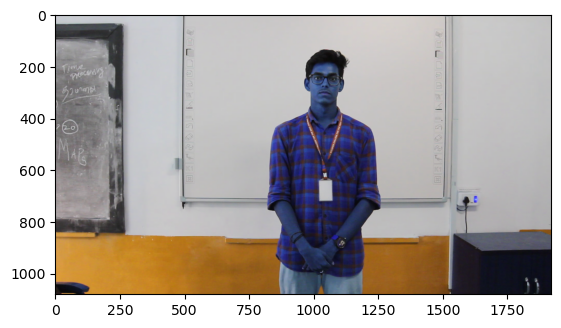

In [8]:
plt.imshow(curr_frame)

In [16]:
curr_frame = cv2.cvtColor(curr_frame, cv2.COLOR_BGR2GRAY)

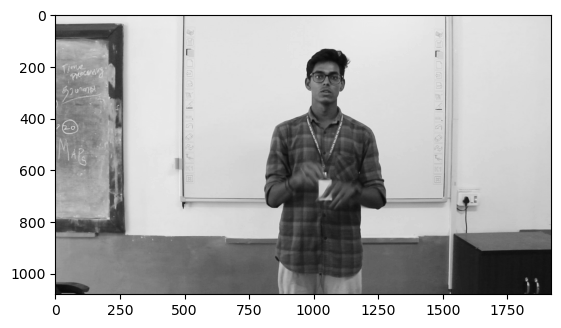

In [17]:
plt.imshow(curr_frame, cmap='gray')

In [18]:
hist = cv2.calcHist([curr_frame], [0], None, [256], [0, 256])

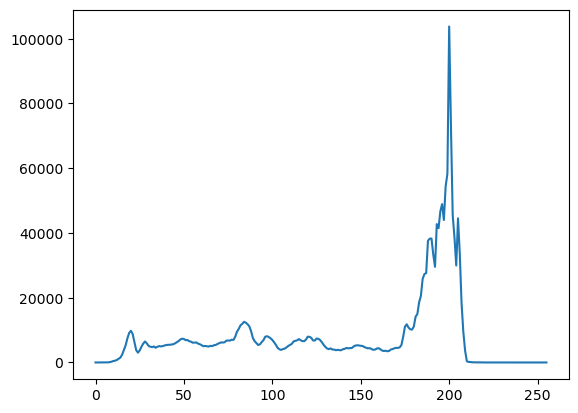

In [21]:
plt.plot(hist)

In [20]:
hist

array([[3.00000e+00],
       [4.00000e+00],
       [2.00000e+00],
       [1.00000e+00],
       [3.00000e+00],
       [7.00000e+00],
       [9.00000e+00],
       [3.40000e+01],
       [1.09000e+02],
       [2.30000e+02],
       [4.40000e+02],
       [5.48000e+02],
       [7.52000e+02],
       [1.12400e+03],
       [1.47800e+03],
       [2.34800e+03],
       [3.76200e+03],
       [5.25500e+03],
       [7.38200e+03],
       [9.08700e+03],
       [9.78500e+03],
       [8.82700e+03],
       [6.39500e+03],
       [3.81300e+03],
       [3.02000e+03],
       [3.73600e+03],
       [4.89200e+03],
       [5.83900e+03],
       [6.49000e+03],
       [5.92200e+03],
       [5.12700e+03],
       [4.86800e+03],
       [4.74600e+03],
       [4.93400e+03],
       [4.55800e+03],
       [4.86800e+03],
       [5.04700e+03],
       [4.95000e+03],
       [5.06800e+03],
       [5.24900e+03],
       [5.39500e+03],
       [5.45400e+03],
       [5.46500e+03],
       [5.54500e+03],
       [5.64200e+03],
       [5.

In [22]:
diffs = []

In [23]:
for i in range(len(frames)-1):
    curr_diff = cv2.absdiff(cv2.calcHist(frames[i], [0], None, [256], [0, 256]),
                           cv2.calcHist(frames[i+1], [0], None, [256], [0, 256]))
    diffs.append(curr_diff)

In [25]:
std = np.std(diffs)
mean = np.mean(diffs)

In [26]:
threshold = std + mean

In [27]:
threshold

20.859085

In [28]:
frame_diff = cv2.absdiff(cv2.calcHist(frames[0], [0], None, [256], [0, 256]),
                        cv2.calcHist(frames[1], [0], None, [256], [0, 256]))

In [31]:
math.dist(cv2.calcHist(frames[0], [0], None, [256], [0, 256]), cv2.calcHist(frames[1], [0], None, [256], [0, 256]))

283.9471781863662

In [32]:
math.dist(cv2.calcHist(frames[45], [0], None, [256], [0, 256]), cv2.calcHist(frames[46], [0], None, [256], [0, 256]))

361.372384113673

In [33]:
distances = []
for i in range(len(frames)-1):
    dist = math.dist(cv2.calcHist(frames[i], [0], None, [256], [0, 256]), cv2.calcHist(frames[i+1], [0], None, [256], [0, 256]))
    distances.append(dist)

In [36]:
for i in range(len(distances)):
    if distances[i] <= threshold: 
        print(distances[i])
    else:
        print(0)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [43]:
iframe_path = r"C:\Users\Kartik Saxena\Machine learning\Deep Learning\Audio deep learning"
filename = r"C:\Users\Kartik Saxena\Machine learning\Deep Learning\Audio deep learning\MVI_2978.MOV"

In [46]:
def iframes():
    if not os.path.exists(iframe_path):
        os.mkdir(iframe_path)
    command = 'ffprobe -v error -show_entries frame=pict_type -of default=noprint_wrappers=1'.split()
    out = subprocess.check_output(command + [filename]).decode()
    f_types = out.replace('pict_type=','').split()
    frame_types = zip(range(len(f_types)), f_types)
    i_frames = [x[0] for x in frame_types if x[1]=='I']
    if i_frames:
        cap = cv2.VideoCapture(filename)
        for frame_no in i_frames:
            cap.set(cv2.CAP_PROP_POS_FRAMES, frame_no)
            ret, frame = cap.read()
            outname = iframe_path+'i_frame_'+str(frame_no)+'.jpg'
            cv2.imwrite(outname, frame)
        cap.release()
        print("I-Frame selection Done!!")

In [47]:
iframes()

I-Frame selection Done!!


In [26]:
image1 = frames[0]
image2 = frames[30]

In [8]:
hist_0 = cv2.calcHist(frame_0, [0], None, [256], [0, 256])
hist_1 = cv2.calcHist(frame_1, [0], None, [256], [0, 256])

In [9]:
len(hist_0), len(hist_1)

(256, 256)

In [13]:
sqt = np.square(hist_0 - hist_1)

In [14]:
dist = sum(np.sqrt(sqt))

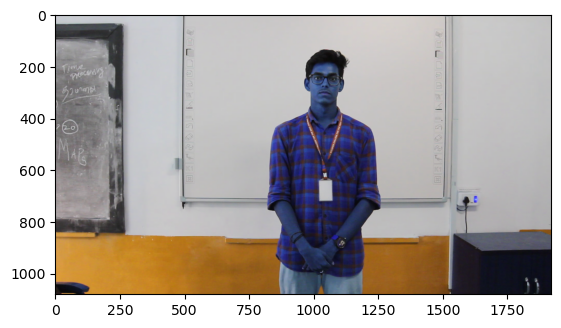

In [16]:
plt.imshow(frame_0)


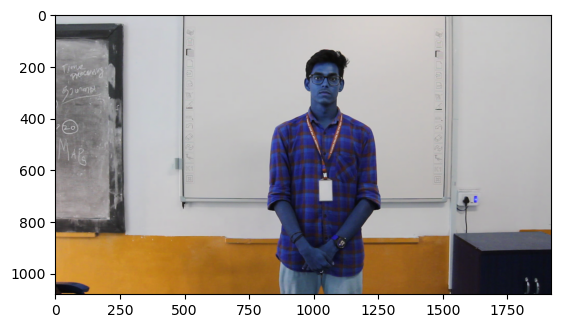

In [17]:
plt.imshow(frame_1)

In [28]:
import cv2
from skimage import metrics
# Load images
image2 = cv2.resize(image2, (image1.shape[1], image1.shape[0]), interpolation = cv2.INTER_AREA)
print(image1.shape, image2.shape)
# Convert images to grayscale
image1_gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
image2_gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
# Calculate SSIM
ssim_score = metrics.structural_similarity(image1_gray, image2_gray, full=True)
print(f"SSIM Score: ", round(ssim_score[0], 2))
# SSIM Score: 0.38

(1080, 1920, 3) (1080, 1920, 3)
SSIM Score:  0.91


In [31]:
def sim_score(image1, image2):
    image2 = cv2.resize(image2, (image1.shape[1], image1.shape[0]), interpolation = cv2.INTER_AREA)
# Convert images to grayscale
    image1_gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    image2_gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
# Calculate SSIM
    ssim_score = metrics.structural_similarity(image1_gray, image2_gray, full=True)
    return ssim_score[0]

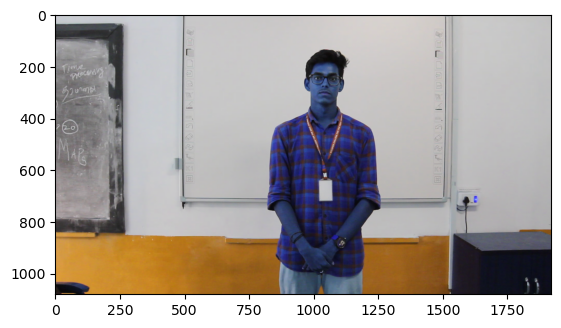

In [23]:
plt.imshow(image1, cmap='gray')

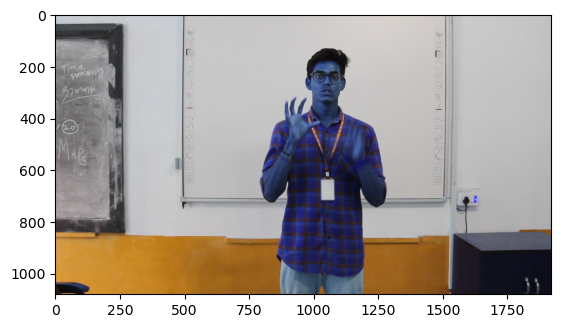

In [27]:
plt.imshow(image2)

In [32]:
print(sim_score(image1, image2))

0.9145080447708845


In [34]:
tv = 0.92

In [36]:
new_frames = []

In [39]:
for i in range(len(frames)):
    curr_score = sim_score(frames[0], frames[i])
    print(f"frame number: {i}, sim_score: {curr_score}")
    if curr_score < tv:
        new_frames.append(frames[i])

frame number: 0, sim_score: 1.0
frame number: 1, sim_score: 0.9859969411970457
frame number: 2, sim_score: 0.9826499615320134
frame number: 3, sim_score: 0.9801152362586307
frame number: 4, sim_score: 0.9771982324954177
frame number: 5, sim_score: 0.9754133509296288
frame number: 6, sim_score: 0.973275685075192
frame number: 7, sim_score: 0.9716476658955613
frame number: 8, sim_score: 0.9690204402088446
frame number: 9, sim_score: 0.9658813049409088
frame number: 10, sim_score: 0.9622589395011211
frame number: 11, sim_score: 0.95886083399473
frame number: 12, sim_score: 0.9517039417489339
frame number: 13, sim_score: 0.9474266249988388
frame number: 14, sim_score: 0.9410371555855391
frame number: 15, sim_score: 0.9402668903190361
frame number: 16, sim_score: 0.942057178622072
frame number: 17, sim_score: 0.9414843147164275
frame number: 18, sim_score: 0.9380897176902444
frame number: 19, sim_score: 0.9367086035805977
frame number: 20, sim_score: 0.9349700624265516
frame number: 21, sim

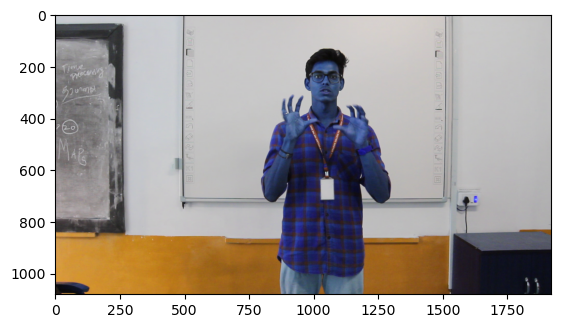

In [45]:
len(new_frames)
plt.imshow(new_frames[8])

In [2]:
!pip install git+https://github.com/openai/CLIP.git
!pip install open_clip_torch
!pip install sentence_transformers

import torch
import open_clip
import cv2
from sentence_transformers import util
from PIL import Image
# image processing model
device = "cuda" if torch.cuda.is_available() else "cpu"
model, _, preprocess = open_clip.create_model_and_transforms('ViT-B-16-plus-240', pretrained="laion400m_e32")
model.to(device)
def imageEncoder(img):
    img1 = Image.fromarray(img).convert('RGB')
    img1 = preprocess(img1).unsqueeze(0).to(device)
    img1 = model.encode_image(img1)
    return img1
def generateScore(image1, image2):
    test_img = cv2.imread(image1, cv2.IMREAD_UNCHANGED)
    data_img = cv2.imread(image2, cv2.IMREAD_UNCHANGED)
    img1 = imageEncoder(test_img)
    img2 = imageEncoder(data_img)
    cos_scores = util.pytorch_cos_sim(img1, img2)
    score = round(float(cos_scores[0][0])*100, 2)
    return score


  Cloning https://github.com/openai/CLIP.git to c:\users\kartik saxena\appdata\local\temp\pip-req-build-0ny28r0j
  Resolved https://github.com/openai/CLIP.git to commit a1d071733d7111c9c014f024669f959182114e33
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Obtaining dependency information for ftfy from https://files.pythonhosted.org/packages/91/f8/dfa32d06cfcbdb76bc46e0f5d69c537de33f4cedb1a15cd4746ab45a6a26/ftfy-6.1.3-py3-none-any.whl.metadata
  Obtaining dependency information for wcwidth<0.3.0,>=0.2.12 from https://files.pythonhosted.org/packages/fd/84/fd2ba7aafacbad3c4201d395674fc6348826569da3c0937e75505ead3528/wcwidth-0.2.13-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/53.4 kB ? eta -:--:--
   ----------------------- ---------------- 30.7/53.4 kB 660.6 kB/s eta 0:00:01
   ----------------------- ---------------- 30.7/53.4 kB 660.6 kB/s eta 0:00:01
   ----------------------- ---------------- 30

  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git 'C:\Users\Kartik Saxena\AppData\Local\Temp\pip-req-build-0ny28r0j'


  Obtaining dependency information for open_clip_torch from https://files.pythonhosted.org/packages/d9/d2/6ae2ee32d0d2ea9982774920e0ef96d439ee332f459f6d8a941149b1b4ad/open_clip_torch-2.24.0-py3-none-any.whl.metadata
  Obtaining dependency information for sentencepiece from https://files.pythonhosted.org/packages/a2/f6/587c62fd21fc988555b85351f50bbde43a51524caafd63bc69240ded14fd/sentencepiece-0.2.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for timm from https://files.pythonhosted.org/packages/68/99/2018622d268f6017ddfa5ee71f070bad5d07590374793166baa102849d17/timm-0.9.16-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
    --------------------------------------- 0.0/1.5 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.5 MB 2.0 MB/s eta 0:00:01
   - -------------------------------------- 0.0/1.5 MB 2.0 MB/s eta 0:00:01
   - -------------------------------------- 0.0/1.5 MB 2.0 MB/s eta 0:00:01
   -

  Obtaining dependency information for sentence_transformers from https://files.pythonhosted.org/packages/68/0d/27475988a3daade7516ea02dbc607b57d4a30f01bb49614a6430e76685c2/sentence_transformers-2.5.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/156.5 kB ? eta -:--:--
   -- ------------------------------------- 10.2/156.5 kB ? eta -:--:--
   ---------- ---------------------------- 41.0/156.5 kB 495.5 kB/s eta 0:00:01
   --------------- ----------------------- 61.4/156.5 kB 469.7 kB/s eta 0:00:01
   --------------------------- ---------- 112.6/156.5 kB 731.4 kB/s eta 0:00:01
   --------------------------- ---------- 112.6/156.5 kB 731.4 kB/s eta 0:00:01
   --------------------------- ---------- 112.6/156.5 kB 731.4 kB/s eta 0:00:01
   -------------------------------------- 156.5/156.5 kB 551.9 kB/s eta 0:00:00


ImportError: cannot import name 'is_nltk_available' from 'transformers.utils.import_utils' (C:\Users\Kartik Saxena\anaconda3\Lib\site-packages\transformers\utils\import_utils.py)

In [14]:
image1 = frames[0]
image2 = frames[5]

In [16]:
print(generateScore(image1, image2))

NameError: name 'generateScore' is not defined

In [5]:
!pip uninstall transformers

^C


In [6]:
!pip install trasnformers==4.27.4

ERROR: Could not find a version that satisfies the requirement trasnformers==4.27.4 (from versions: none)
ERROR: No matching distribution found for trasnformers==4.27.4


In [22]:
import torch
import open_clip 
import cv2
from sentence_transformers import util
from PIL import Image

ImportError: cannot import name 'is_nltk_available' from 'transformers.utils.import_utils' (C:\Users\Kartik Saxena\anaconda3\Lib\site-packages\transformers\utils\import_utils.py)

In [23]:
import transformers

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model, _, preprocess = open_clip.create_model_and_transforms('ViT-B-16-plus-240', pretrained="laion400m_e32")
model.to(device)

 13%|█████▏                                 | 112M/834M [01:00<03:20, 3.61MiB/s]

In [21]:
def imageEncoder(img):
    #img1 = Image.fromarray(img).convert('RGB')
    img1 = preprocess(img1).unsqueeze(0).to(device)
    img1 = model.encode_image(img1)
    return img1
def generateScore(image1, image2):
    test_img = image1
    data_img = image2
    img1 = imageEncoder(test_img)
    img2 = imageEncoder(data_img)
    cos_scores = util.pytorch_cos_sim(img1, img2)
    score = round(float(cos_scores[0][0])*100, 2)
    return score


In [22]:
print(generateScore(image1, image2))

NameError: name 'preprocess' is not defined